<a href="https://colab.research.google.com/github/Nyfeu/ComputerVision/blob/main/PyTesseract_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando o ambiente



O primeiro passo para nossos projetos de visão computacional em Python é a instalação das dependências necessárias.

No caso, visaremos três:
- **NumPy** - é uma biblioteca numérica disponível para Python.
- **OpenCV** - biblioteca destinada à visão compuutacional em tempo real.
- **PyTesseract** - interface para Python da biblioteca Tesseract OCR.

In [ ]:
!pip install opencv-python==4.8.0
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9

O passo seguinte é a importação das dependências. O google.colab.patches é utilizado por uma questão de compatibilidade com o Google Colab.

In [27]:
import pytesseract
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

O material utilizado na aula está num repositório remoto no GitHub. Para que possamos usá-lo, basta clonar esse repositório:

In [28]:
! git clone https://github.com/sthemonica/text-recognize

fatal: destination path 'text-recognize' already exists and is not an empty directory.


Checando se as versões instaladas e importadas em nosso ambiente de desenvolvimento estão de acordo com o esperado.

In [29]:
pytesseract.__version__

'0.3.9'

In [30]:
cv2.__version__

'4.8.0'

# Case 01 - Imagem em preto e branco


O primeiro passo é importar a imagem "teste.png" (que será utilizada), através da biblioteca OpenCV - utilizando o método ```imread()```. A função ```cv2_imshow```, por sua vez, é responsável por exibir a imagem passada como argumento.

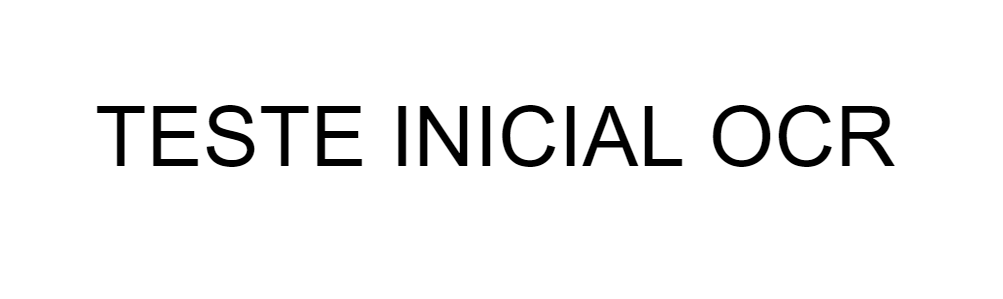

In [31]:
img = cv2.imread('/content/text-recognize/Imagens/Aula1-teste.png')
cv2_imshow(img)

Uma vez lida a imagem em questão, podemos utilizar o PyTesseract para ler o texto (string) contido nela - através do método ```pytesseract.image_to_string()```. Em seguida, pode-se verificar a validade do texto obtido.

In [32]:
text = pytesseract.image_to_string(img)
print(text)

TESTE INICIAL OCR



# Case 02 - Imagens coloridas

Importando e exibindo a imagem a ser trabalhada.

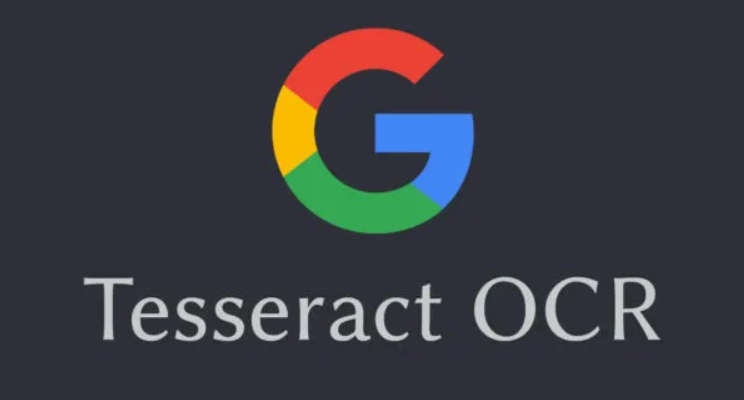

In [61]:
img = cv2.imread('/content/text-recognize/Imagens/Aula1-ocr.png')
cv2_imshow(img)

O OpenCV tem seus canais de cores invertidos, então, para utilizarmos com outras bibliotecas, precisamos fazer a conversão de BGR para RGB. Para isso, o método ```cvtColor()``` será utilizado para a conversão. O atributo ```cv2.COLOR_BGR2RGB``` é responsável por denotar a conversão de BGR para RGB.

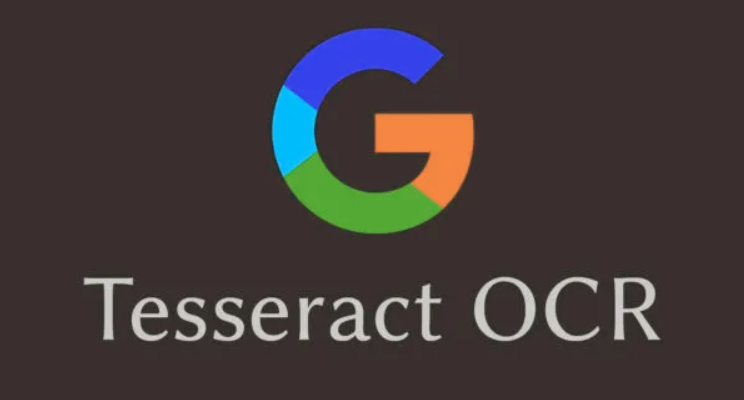

In [62]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [35]:
text = pytesseract.image_to_string(rgb)
print(text)

c

Tesseract OCR



Podemos também converter nossa imagem para tons de cinza, utilizando o atributo ```cv2.COLOR_BGR2GRAY```. No entanto, é importante reparar que alguns detalhes são perdidos - como o caso da distinção entre as seções coloridas da logo do Google.

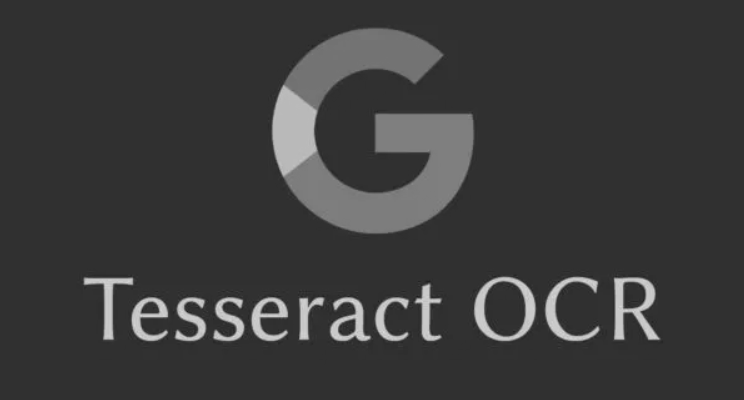

In [36]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [37]:
text = pytesseract.image_to_string(gray)
print(text)

C

Tesseract OCR



Este é um processo de **pré-processamento** da imagem. Pode-se reparar que, mesmo assim, a letra G ainda não é reconhecida apropriadamente - apesar de ter passado de ```c``` para ```C```.

Outra opção intererssante é converter as cores para obtenção de um sinal UV. Esse sinal era utilizado em televisões analógicass para colorir as saídas que anteriormente eram preto e branco - como no [link](https://en.wikipedia.org/wiki/Y%E2%80%B2UV). Para isso, basta utilizar o argumento: ```cv2.BGR2YUV```.

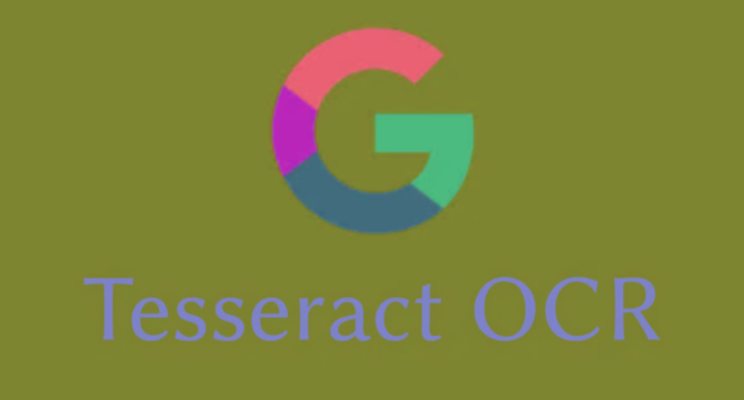

In [38]:
yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
cv2_imshow(yuv)

# Case 03 - Caracteres diferentes

Importando e exibindo a imagem a ser trabalhada:

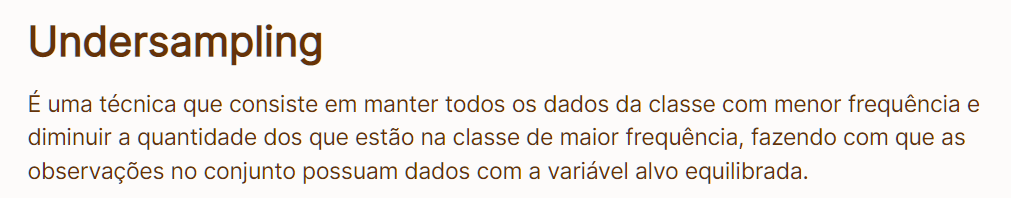

In [63]:
img = cv2.imread('/content/text-recognize/Imagens/Aula2-undersampling.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

Agora, se tentarmos extrair o texto da imagem:

In [42]:
text = pytesseract.image_to_string(rgb)
print(text)

Undersampling

E uma técnica que consiste em manter todos os dados da classe com menor frequéncia e
diminuir a quantidade dos que estdo na classe de maior frequéncia, fazendo com que as
observagées no conjunto possuam dados com a variavel alvo equilibrada.



Podemos verificar que a ortografia da língua portuguesa não foi reconhecida de forma correta. Podemos verificar a lista de linguagens que são reconhecidas pelo Tesseract em nosso ambiente:

In [43]:
!tesseract --list-langs

List of available languages (2):
eng
osd


Repare que a língua portuguesa não está inclusa nessa lista. Por conta disso, deveremos instalá-la.

In [44]:
!apt-get install tesseract-ocr-por

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-por
0 upgraded, 1 newly installed, 0 to remove and 32 not upgraded.
Need to get 856 kB of archives.
After this operation, 1,998 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-por all 1:4.00~git30-7274cfa-1.1 [856 kB]
Fetched 856 kB in 1s (1,249 kB/s)
Selecting previously unselected package tesseract-ocr-por.
(Reading database ... 121794 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-por_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-por (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-por (1:4.00~git30-7274cfa-1.1) ...


In [45]:
!tesseract --list-langs

List of available languages (3):
eng
osd
por


Agora que a língua portuguesa para o Tesseract foi instalada corretamente - denotada por ```por``` - podemos especificar para o PyTesseract a linguagem desejada.

In [46]:
text = pytesseract.image_to_string(rgb, lang='por')
print(text)

Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.



Dessa forma, o texto da imagem foi extraído de maneira correta. Sem erros de acentuação e reconhecendo os caracteres de forma precisa.

Para que não seja necessária a instalação da linguagem. Podemos incluir essas dependências no próprio projeto. Para isso, vamos criar o diretório ```tessdata``` e importar as linguagens a partir do GitHub.

In [47]:
!mkdir tessdata

In [ ]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

Para verificar as linguagens incluídas:

In [50]:
!ls tessdata/

eng.traineddata  por.traineddata


Agora, precisamos definir as configurações do Tesseract. Para tal:

In [64]:
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.



Para ter certeza, podemos remover o pacote de linguagem que instalamos anteriormente em nosso ambiente.

In [54]:
!apt remove tesseract-ocr-por

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages will be REMOVED:
  tesseract-ocr-por
0 upgraded, 0 newly installed, 1 to remove and 32 not upgraded.
After this operation, 1,998 kB disk space will be freed.
(Reading database ... 121798 files and directories currently installed.)
Removing tesseract-ocr-por (1:4.00~git30-7274cfa-1.1) ...


In [57]:
!tesseract --list-langs

List of available languages (2):
eng
osd


Rodando o mesmo comando que rodamos anteriormente - utilizando a configuração que define as linguagens - obteremos o mesmo resultado.

In [55]:
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.



# Case 04 - Page Segmentation Modes (PSMs)

Os modos de segmentação de página, mais conhecidos como PSMs, são extremamente importantes para melhorar a precisão usando OCR - principalmente quando temos imagens mais complexas.

Quando o PSM é identificado de maneira equivocada, tem-se dois possíveis retornos:
- Resultado vazio - não reconhece nenhum texto na imagem.
- Resultado com caracteres sem sentido.

Vamos brincar um pouco com esse conceito agora. O primeiro passo é importar a imagem a ser reconhecida.

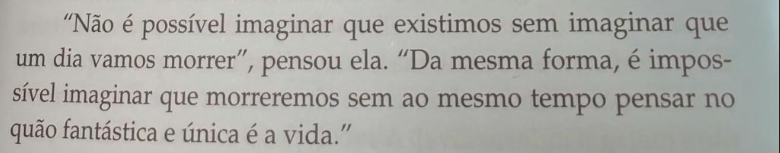

In [65]:
img = cv2.imread('/content/text-recognize/Imagens/Aula2-trecho-livro.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

Aplicando as configurações que já abordamos, podemos verificar que o texto é lido de forma correta.

In [72]:
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

“Não é possível imaginar que existimos sem imaginar que
um dia vamos morrer”, pensou ela. “Da mesma forma, é impos-
sível imaginar que morreremos sem ao mesmo tempo pensar no
quão fantástica e única é a vida.”



Mas, que PSM foi identificado? Primeiramente, podemos verificar a lista de todos os PSMs possíveis. Com uma abordagem superficial é simples identificar que se trata do PSM 6 - que assume um bloco de texto uniforme.

In [68]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


Agora, especificando nas configurações o PSM 6, obteremos o resultado correto, da mesma forma que anteriormente. Assim, verifica-se que, de fato, trata-se do PSM 6.

In [71]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

“Não é possível imaginar que existimos sem imaginar que
um dia vamos morrer”, pensou ela. “Da mesma forma, é impos-
sível imaginar que morreremos sem ao mesmo tempo pensar no
quão fantástica e única é a vida.”



No entanto, se trocarmos para o PSM 7, não obteremos resultado.

In [69]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

No caso do PSM 8, é retornada uma sequência de caracteres sem nenhum sentido.

In [70]:
config_tesseract = '--tessdata-dir tessdata --psm 8'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

ªfâ%êããããââª%%?ªííÉ:D;Z:Én:gíríãrgâgíie::ugfâ|



Caindo exatamente nos casos especificados anteriormente.

# Case 05 - Orientation and Script Detection (OSD)

O OSD retorna os chamados **metadados** da imagem. Informando a quantidade de páginas, orientação em graus, se a imagem está ou não rotacionada. Ele é bastante utilizado para obtenção de informações das imagens: fundos brancos, fundos que não interessam, onde está o texto, se a imagem está rotacionada, se temos um PDF com milhares de páginas...

In [73]:
from PIL import Image
import matplotlib.pyplot as plt

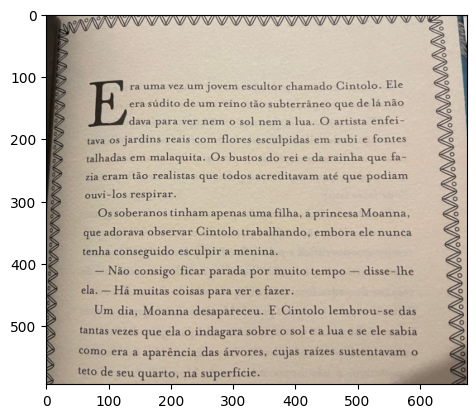

In [87]:
img = Image.open('/content/text-recognize/Imagens/Aula2-livro.png')
plt.imshow(img);

In [76]:
print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 0.93
Script: Latin
Script confidence: 2.46



# Case 06 - Selecionando textos

Podemos testar também com um caso manuscrito. A imagem foi importada e convertida para RGB.

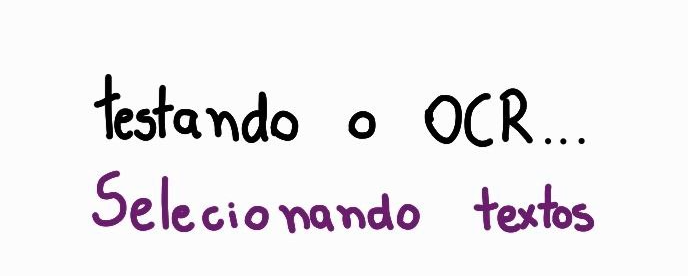

In [114]:
img = cv2.imread('/content/text-recognize/Imagens/Aula3-testando.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

Iremos importar o método Output do Pytesseract para que possamos obter informações detalhadas do reconhecimento da imagem.

In [90]:
from pytesseract import Output

In [115]:
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 5, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 3, 0, 1, 2],
 'left': [0, 92, 92, 94, 94, 348, 425, 92, 92, 474],
 'top': [0, 74, 74, 74, 74, 111, 88, 171, 171, 184],
 'width': [688, 502, 502, 491, 204, 28, 160, 502, 328, 120],
 'height': [276, 159, 159, 73, 69, 28, 59, 62, 62, 49],
 'conf': ['-1', '-1', '-1', '-1', 63, 90, 48, '-1', 85, 77],
 'text': ['',
  '',
  '',
  '',
  'Testando',
  'o',
  'OCR..',
  '',
  'Selecionando',
  'textos']}

Repare que o mais importante de tudo aqui é o termo ```conf``` - que diz respeito ao nível de confiança do algoritmo. No caso, quanto maior for, melhor. Quando for -1, não nenhuma confiança - de forma que o ```text``` será uma string vazia. Aonde for diferente de -1, teremos a leitura da palavra escrita.

Além disso, alguns parâmetros como a posição e espaço dessas leituras são obtidas a partir dos termos: ```left```, ```top```, ```width``` e ```height```. Com isso, podemos criar caixas de seleção, explicitando a região lida e o texto que foi reconhecido.

O primeiro passo é definir o nível mínimo de confiança que desejamos. Para isso, criaremos um slider (uma feature do Google Colab) - que permite uma edição mais interativa.

In [101]:
min_conf = 40 #@param {type: 'slider', min: 0, max: 100}

O próximo passo é criar o procedimento que desenhará a caixa de delimitadora. Para isso, usaremos o método ```rectangle``` do ```cv2```. Repare que o vértice é dado por ```left``` e ```top```, enquanto ```width``` e ```height``` denotam a região como um todo.

Outro fator importante é que cada item na lista é na verdade uma caixa delimitadora. Ou seja, para esboçar todas elas, devemos percorrer todos os índices da lista.

Outra parte importante é escrever a leitura na imagem. Para tal, iremos utilizar o método ```cv2.putText()``` exibindo o termo ```text``` dos nossos dados.

In [125]:
def bounding_box(img,color=(255,100,0)):

  for i in range(len(resultado['text'])):

    confianca = int(resultado['conf'][i])

    if confianca > min_conf:

      x = resultado['left'][i]
      y = resultado['top'][i]
      w = resultado['width'][i]
      h = resultado['height'][i]

      cv2.rectangle(img, (x,y), (x+w,y+h), color, 2)

      text = resultado['text'][i]
      cv2.putText(img, text, (x,y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color)

Agora, para utilizar a função que gerará as caixas delimitadoras e escreverá o que foi reconhecido - ```bounding_box``` - faremos uma cópia da imagem rgb (para resguardar a imagem original). Em seguida, após a aplicação da função, exibiremos o resultado.

**OBS.:** repare que ```color=(255,100,0)``` trata-se de um valor padrão, ou seja, que será adotado caso nenhum outro for informado.

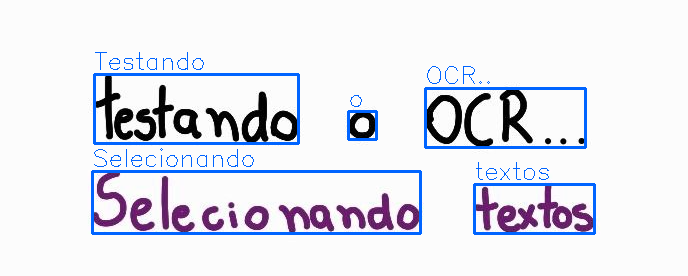

In [126]:
img_copia = rgb.copy()
bounding_box(img_copia)
cv2_imshow(img_copia)

Podemos ainda salvar o nosso resultado. Com todas essas detecções e caixas delimitadoras que criamos.

Primeiramente, vamos criar uma pasta dentro dos arquivos do Colab.

In [129]:
import os
os.makedirs('images_tesseract', exist_ok=True)

Esse comando garantirá que o diretório não seja criado várias vezes.

Agora, para, de fato, salvar a imagem:

In [132]:
cv2.imwrite('/content/images_tesseract/manuscrito.png', img_copia)

True